# Mini poyecto 1
Regresores lineales MLH y Bayesianos.
Importamos librerias e ingresamos el archivo SkillCraft1_Dataset.csv

In [54]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from numpy.linalg import inv
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

new_table = pd.read_csv("SkillCraft1_Dataset.csv")
header = list(new_table)
NaN_index = [] 

In [56]:
for h in header:
    c = 0
    for n in new_table[h]:
        if n == '?':
            new_table.drop(new_table.index[c],inplace=True)
            continue
        c = c + 1
#Mostramos la tabla generada
#new_table['Index'] = [x for x in range(len(y))]
new_table.reset_index(drop=False,inplace=True)
new_table[0:5]

,level_0,index,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,...,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,0,0,52,5,27,10,3000,143.7180,0.003515,0.000220,...,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,1,1,55,5,23,10,5000,129.2322,0.003304,0.000259,...,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,2,2,56,4,30,10,200,69.9612,0.001101,0.000336,...,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,3,3,57,3,19,20,400,107.6016,0.001034,0.000213,...,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,4,4,58,3,32,10,500,122.8908,0.001136,0.000327,...,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


# LeagueIndex
LeagueIndex fue la caracteristica a determinar escogida por nosotros a partir de las siguientes:

-TotalHours

-UniqueHotkeys

-MinimapAttacks

-NumberOfPACs

-ActionsInPAC

-TotalMapExplored

-WorkersMade

-ComplexAbilitiesUsed


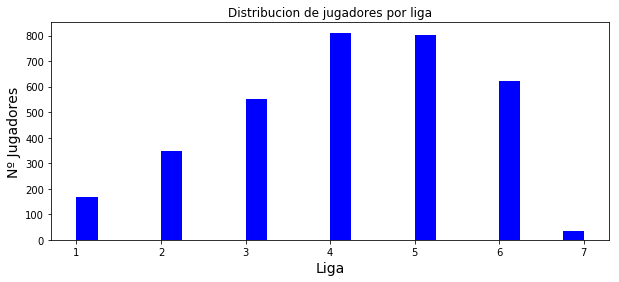

In [65]:
def calculate_bins(x):
    dh = 4.5 * x.std()/(len(x)**(1./2.5))
    b = int(np.round((x.max() - x.min())/dh)) 
    return b

plt.figure(figsize=(10,4))
plt.title('Distribucion de jugadores por liga')
plt.hist(new_table['LeagueIndex'], bins=calculate_bins(new_table['LeagueIndex']),facecolor='b')
plt.xlabel('Liga',fontsize=14)
plt.ylabel('Nº Jugadores',fontsize=14)
plt.savefig('ditribucion_por_liga.jpeg')

In [35]:
def error_prediction(mu,y,phi):
    Y_predict_list = []
    xnp = np.arange(1,(len(X)+1))
    for i in range(len(y)):
        y_predict = mu[0]
        for j,x in enumerate(xnp):
            y_predict = y_predict + mu[(j+1)]*float(phi[i,x]) 
        Y_predict_list.append(y_predict)
    e = mean_squared_error(y,Y_predict_list)
    return Y_predict_list, e

# Regresion por maxima verosimilitud

In [36]:
y = new_table['LeagueIndex']
X = ['TotalHours','UniqueHotkeys','NumberOfPACs','ActionsInPAC','TotalMapExplored','WorkersMade','HoursPerWeek','SelectByHotkeys']
#X = [i for i in new_table.columns[3:-1]]

phi = np.zeros((len(y),len(X)+1))
phi[:,0] = np.ones(len(y))
for i,x in enumerate(X):
    phi[:,i+1] = np.asarray(new_table[x]) 
#phi[:,6] = phi[:,6]*(-1)
phi_t = phi.T
t = np.zeros((len(y),1))
t[:,0] = y
multiplicate_phi = np.dot(phi_t,phi)
inverse_of_phi = inv(multiplicate_phi)
phi_final = np.dot(inverse_of_phi,phi_t)
w = np.dot(phi_final,t)

In [37]:
Y_result1 = []
for i in range(len(y)):
    y_predict = w[0]
    for j,x in enumerate(X):
            y_predict = y_predict + w[j+1]*float(new_table[x][i]) 
    Y_result1.append(y_predict)

MSE: 1.107052253737872


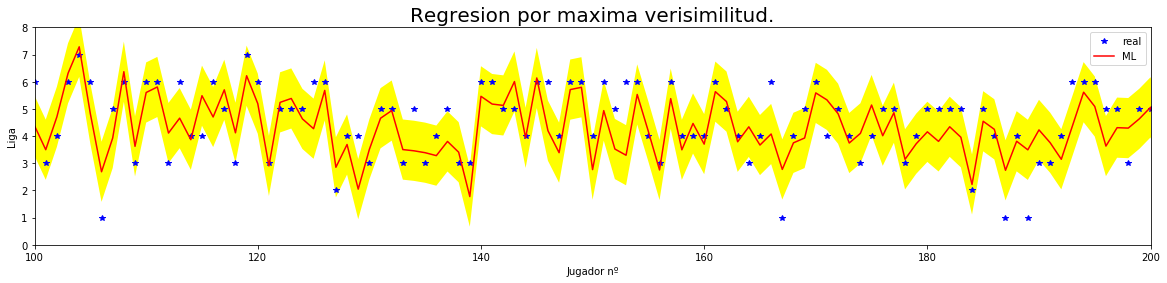

In [38]:
beta = mean_squared_error(y,Y_result1)
print('MSE:',beta)
x_label = range(0,len(y))
Y_result1 = [float(i) for i in Y_result1]
Y_result1 = np.asarray(Y_result1).T
plt.figure(figsize =(20,4))
plt.title('Regresion por maxima verisimilitud.',fontsize=20)
plt.plot(x_label,y,'b*',label='real')
plt.plot(x_label,Y_result1,'r-',label='ML')
plt.fill_between(range(0,len(y)), Y_result1-beta, Y_result1+beta, facecolor='yellow')
plt.axis([100,200, 0, 8])
plt.xlabel('Jugador nº')
plt.ylabel('Liga')
plt.legend()
plt.savefig('likehood.jpeg')

# Regresion Bayesiana

In [8]:
Sigma_N = 0
mu_N = 0
alpha = np.arange(-10,11,0.1)
b = beta
#beta = beta*2
error = 2
min_error = []

for i,a in enumerate(alpha):
    Sigma_N = np.linalg.inv(a * np.identity(phi.shape[1]) + b * np.dot(phi_t, phi))
    mu_N = b * np.dot(Sigma_N, np.dot(phi_t, t))
    foo,error_predict_ab = error_prediction(mu_N,y,phi)
    if error_predict_ab < error:
        min_error.append([a,b,error_predict_ab])
        error = error_predict_ab

In [41]:
min_error_total = [x[2] for x in min_error]
print(min_error[np.argmin(min_error_total)])

[-3.552713678800501e-14, 1.107052253737872, 1.107052253737872]


In [42]:
a = min_error[np.argmin(min_error_total)][0]
b = min_error[np.argmin(min_error_total)][1]
Sigma_N = np.linalg.inv(a * np.identity(phi.shape[1]) + b * np.dot(phi_t, phi))
mu_N = b * np.dot(Sigma_N, np.dot(phi_t, t))

MSE: 1.107052253737872


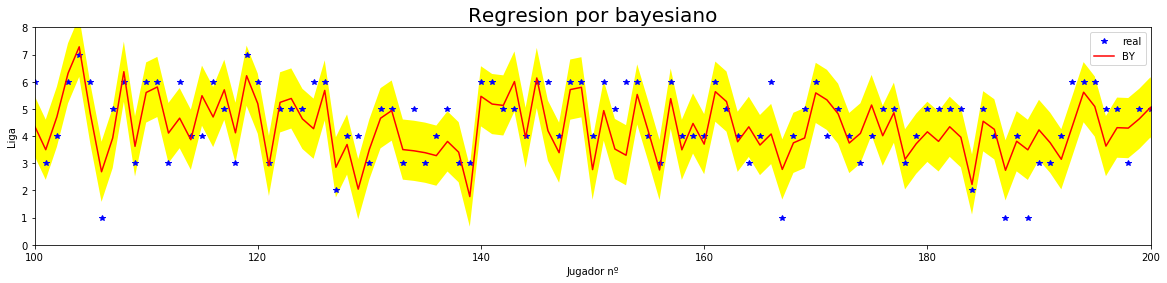

In [43]:
Y_result2, b = error_prediction(mu_N,y,phi)
print('MSE:',b)
Y_result2 = [float(i) for i in Y_result2]
Y_result2 = np.asarray(Y_result2)
plt.figure(figsize =(20,4))
plt.title('Regresion por bayesiano',fontsize=20)
plt.plot(x_label,y,'b*',label='real')
plt.plot(x_label,Y_result2,'r-',label='BY')
plt.fill_between(range(0,len(y)), Y_result2-b, Y_result2+b, facecolor='yellow')
plt.axis([100,200, 0, 8])
plt.xlabel('Jugador nº')
plt.ylabel('Liga')
plt.legend()
plt.savefig('bayesiano.jpeg')

# Regresion polinomial con grado igual 2

MSE: 1.016782544341126


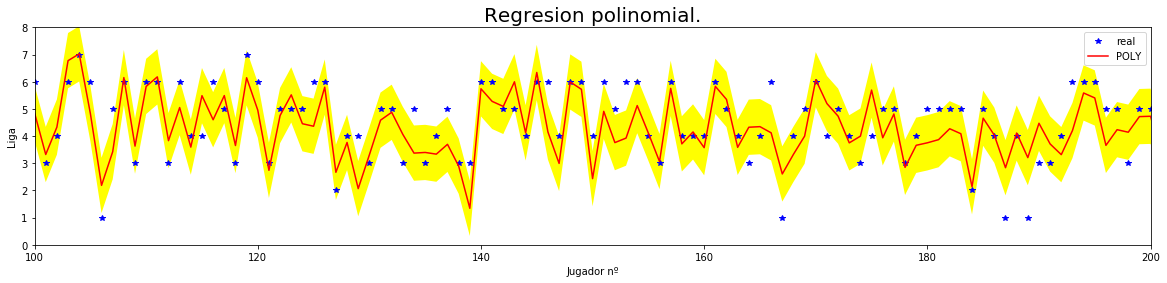

In [44]:
accuracy = 0.1000000
Y_result3 = []
poly = PolynomialFeatures(2)

clf = LinearRegression()
phi_transform = poly.fit_transform(phi[:,1:(len(X)+1)])
fit = clf.fit(phi_transform,y)
Y_in_for = clf.predict(phi_transform)
accuracy_in_for = mean_squared_error(y,Y_in_for)
if accuracy_in_for > accuracy:
    accuracy = accuracy_in_for
    Y_result3 = Y_in_for


beta = mean_squared_error(y,Y_result3)
print('MSE:',beta)
plt.figure(figsize =(20,4))
plt.title('Regresion polinomial.',fontsize=20)
plt.plot(x_label,y,'b*',label='real')
plt.plot(x_label,Y_result3,'r-',label='POLY')
plt.fill_between(range(0,len(y)), Y_result3+beta, Y_result3-beta, facecolor='yellow')
plt.axis([100,200, 0, 8])
plt.xlabel('Jugador nº')
plt.ylabel('Liga')
plt.legend()
plt.savefig('polinomial.jpeg')


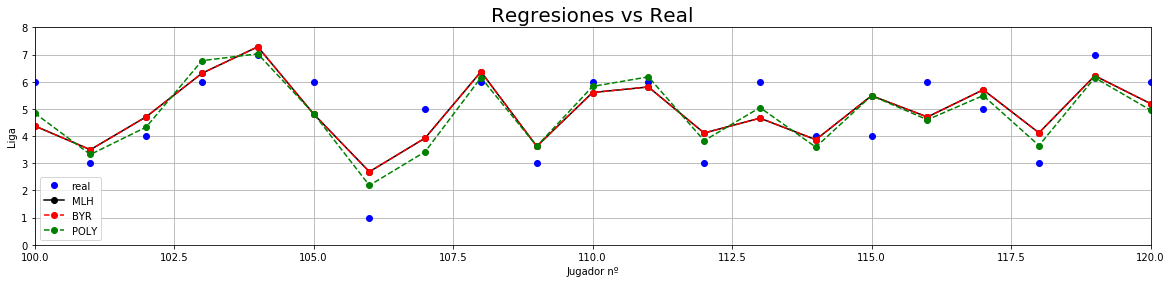

In [45]:
plt.figure(figsize =(20,4))
plt.title('Regresiones vs Real',fontsize=20)
plt.plot(x_label,y,'bo',label='real')
plt.plot(x_label,Y_result1,'ko-',label='MLH')
plt.plot(x_label,Y_result2,'ro--',label='BYR')
plt.plot(x_label,Y_result3,'go--',label='POLY')
#plt.fill_between(range(0,len(y)), Y_result-b, Y_result+b, facecolor='yellow')
plt.axis([100,120, 0, 8])
plt.grid()
plt.xlabel('Jugador nº')
plt.ylabel('Liga')
plt.legend()
plt.savefig('Regresiones.jpeg')

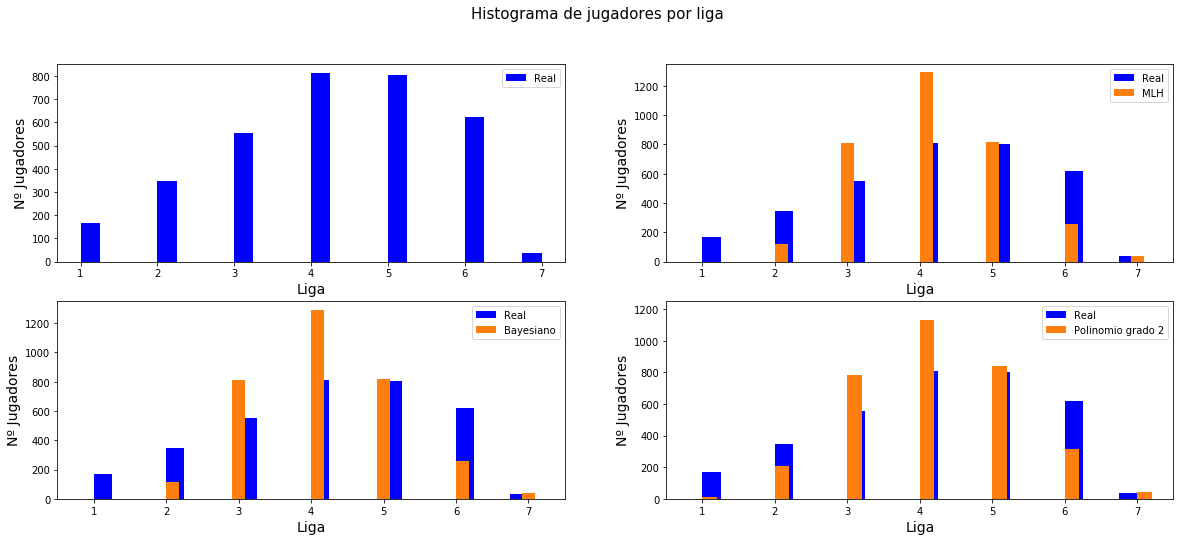

In [48]:
Y_result1 = np.asarray([round(i) for i in Y_result1])
Y_result2 = np.asarray([round(i) for i in Y_result2])
Y_result3 = np.asarray([round(i) for i in Y_result3])

plt.figure(figsize = (20,8))
plt.subplot(2,2,1)
n,_,_ = plt.hist(y,bins=calculate_bins(y), facecolor='b',label='Real')
plt.xlabel('Liga',fontsize=14)
plt.ylabel('Nº Jugadores',fontsize=14)
plt.legend()
plt.subplot(2,2,2)
n,_,_ = plt.hist(y,bins=calculate_bins(y), facecolor='b',label='Real')
n,_,_ = plt.hist(Y_result1,bins=calculate_bins(Y_result1),label='MLH')
plt.xlabel('Liga',fontsize=14)
plt.ylabel('Nº Jugadores',fontsize=14)
plt.legend()
plt.axis([0.5, 7.5, 0, 1350])
plt.subplot(2,2,3)
n,_,_ = plt.hist(y,bins=calculate_bins(y), facecolor='b',label='Real')
n,_,_ = plt.hist(Y_result2,bins=calculate_bins(Y_result2),label='Bayesiano')
plt.xlabel('Liga',fontsize=14)
plt.ylabel('Nº Jugadores',fontsize=14)
plt.legend()
plt.axis([0.5, 7.5, 0, 1350])
plt.subplot(2,2,4)
n,_,_ = plt.hist(y,bins=calculate_bins(y), facecolor='b',label='Real')
n,_,_ = plt.hist(Y_result3,bins=calculate_bins(Y_result3),label='Polinomio grado 2')
plt.xlabel('Liga',fontsize=14)
plt.ylabel('Nº Jugadores',fontsize=14)
plt.legend()
plt.axis([0.5, 7.5, 0, 1250])
plt.suptitle('Histograma de jugadores por liga',fontsize=15)
plt.savefig('histograma.jpeg')